Installing rdkit

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 47.1 MB/s eta 0:00:00


Importing all the necessary libraries and modules

In [ ]:
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw, AllChem, PandasTools, BRICS, MACCSkeys, Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D, SimilarityMaps
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity, DiceSimilarity
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors3D
import warnings

import pandas as pd
import numpy as np
from collections import Counter

warnings.filterwarnings('ignore')
RDLogger.DisableLog('rdApp.*')

Reading Excel files

In [ ]:
df = pd.read_excel('/nitrogencompounds.xlsx')

In [ ]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


Creating Mol object from SMILES

In [ ]:
mol = rdkit.Chem.MolFromSmiles('O=CN1CCCCC1')

In [ ]:
print(mol)

Drawing the generated Mol object

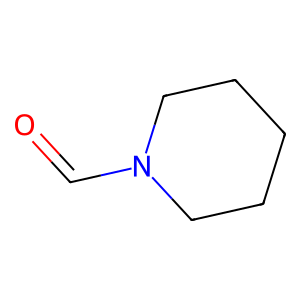

In [ ]:
img = Draw.MolToImage(mol)
img

Adding Hydrogen atoms to the image

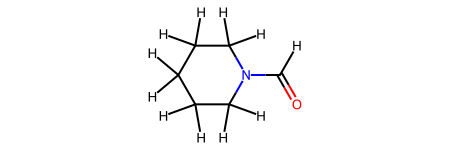

In [ ]:
mol_2 = Chem.AddHs(mol)
mol_2

Saving image as png file

In [ ]:
Draw.MolToFile(mol_2, 'mol_2.png')

In [ ]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


Creating mol object for all SMILES

In [ ]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

In [ ]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d2462dc0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217e180>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217e340>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217e3b0>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217e420>


Creating a Grid image from a subset of generated mol objects

In [ ]:
img = Draw.MolsToGridImage(df['Mol'][:16], molsPerRow=4, subImgSize=(300,300), legends=[x for x in df['Name'][:16]])
img

open('image.png', 'wb').write(img.data)

110136

Using PandasTools to convert SMILES to mol object

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, 'Smiles', 'Mol')

In [ ]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>


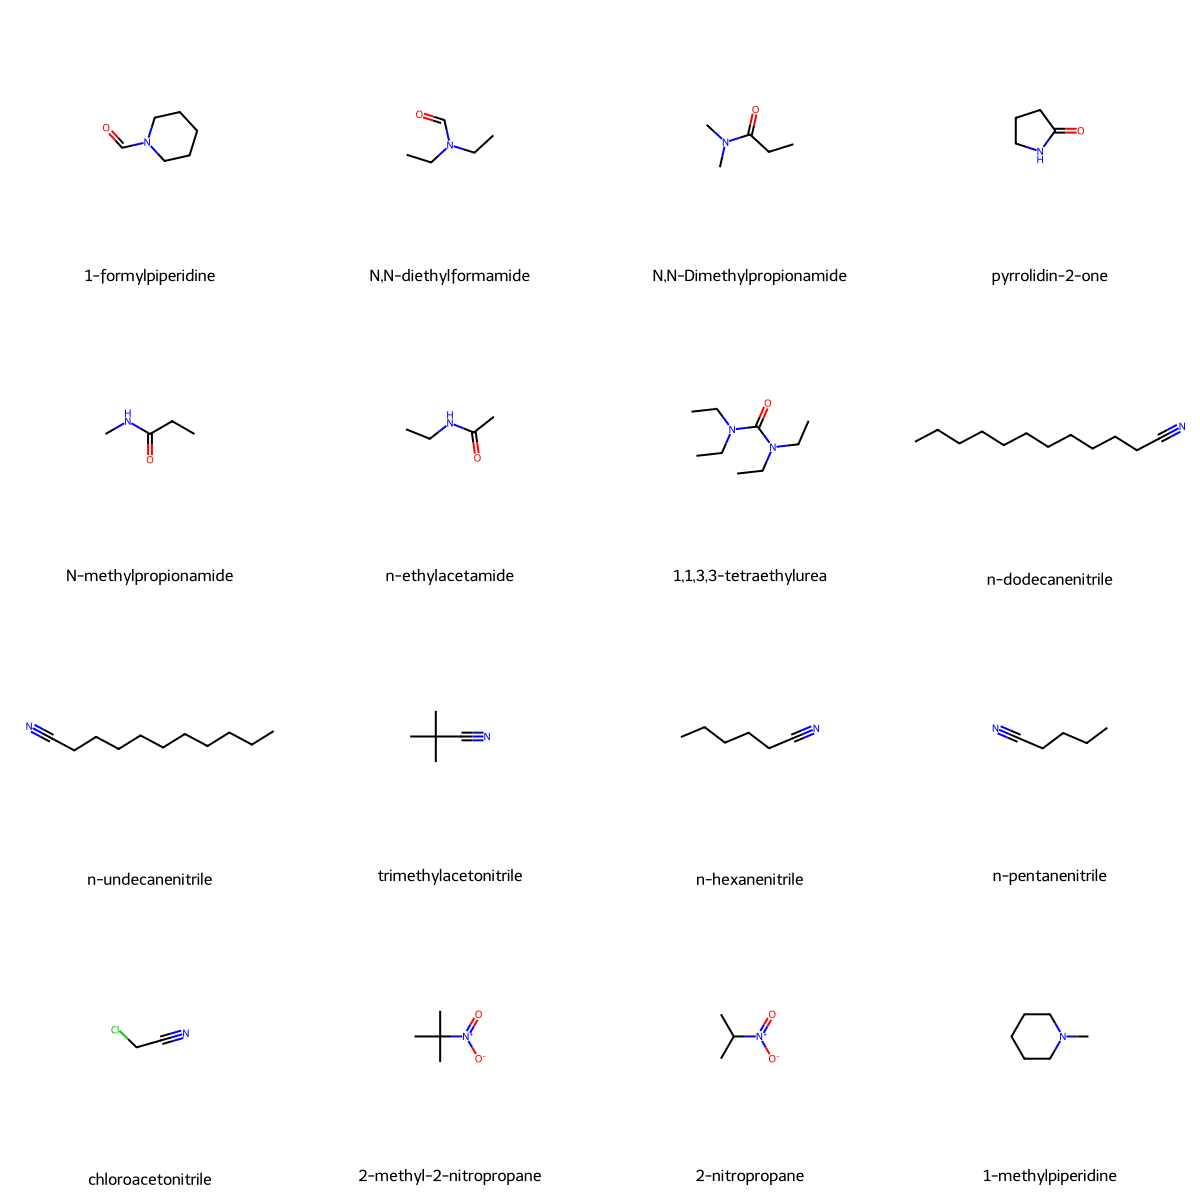

In [ ]:
img = Draw.MolsToGridImage(df['Mol'][:16], subImgSize=(300, 300), molsPerRow=4, legends=[x for x in df['Name'][:16]])
img

Reading SDF Files

In [ ]:
sdf = PandasTools.LoadSDF('/pyrrolidin-2-one.sdf', smilesName='SMILES', molColName='Molecule')

,PUBCHEM_COMPOUND_CID,PUBCHEM_COMPOUND_CANONICALIZED,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,PUBCHEM_CACTVS_SUBSKEYS,PUBCHEM_IUPAC_OPENEYE_NAME,PUBCHEM_IUPAC_CAS_NAME,PUBCHEM_IUPAC_NAME_MARKUP,...,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_ISOTOPIC_ATOM_COUNT,PUBCHEM_COMPONENT_COUNT,PUBCHEM_CACTVS_TAUTO_COUNT,PUBCHEM_COORDINATE_TYPE,ID,SMILES,Molecule
0,12025,1,69.9,1,1,0,AAADcYBiIAAAAAAAAAAAAAAAAAAAAWAAAAAAAAAAAAAAAA...,pyrrolidin-2-one,2-pyrrolidinone,pyrrolidin-2-one,...,0,0,0,0,1,-1,1\n5\n255,12025,O=C1CCCN1,

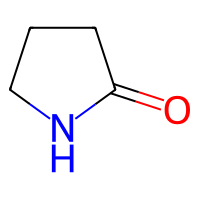

In [ ]:
sdf

In [ ]:
mol = sdf['Molecule'][0]

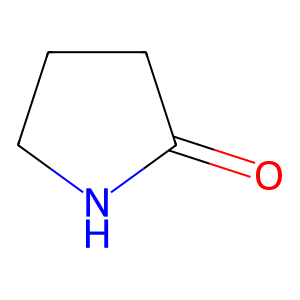

In [ ]:
img_sdf = Draw.MolToImage(mol)
img_sdf

Reading multiple molecules from a single SDF file

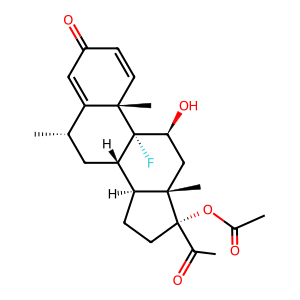

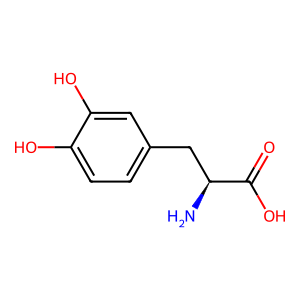

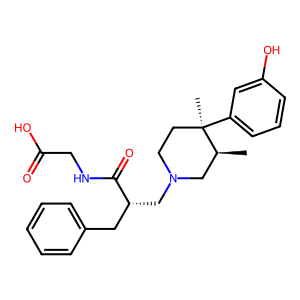

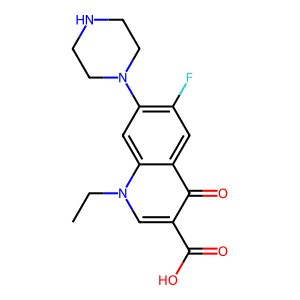

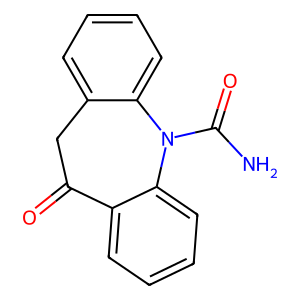

In [ ]:
sdmol = Chem.SDMolSupplier('/approved_drugs.sdf')
for mol in list(sdmol)[:5]:
  img_3 = Draw.MolToImage(mol)
  display(img_3)

In [ ]:
len(sdmol)

1284

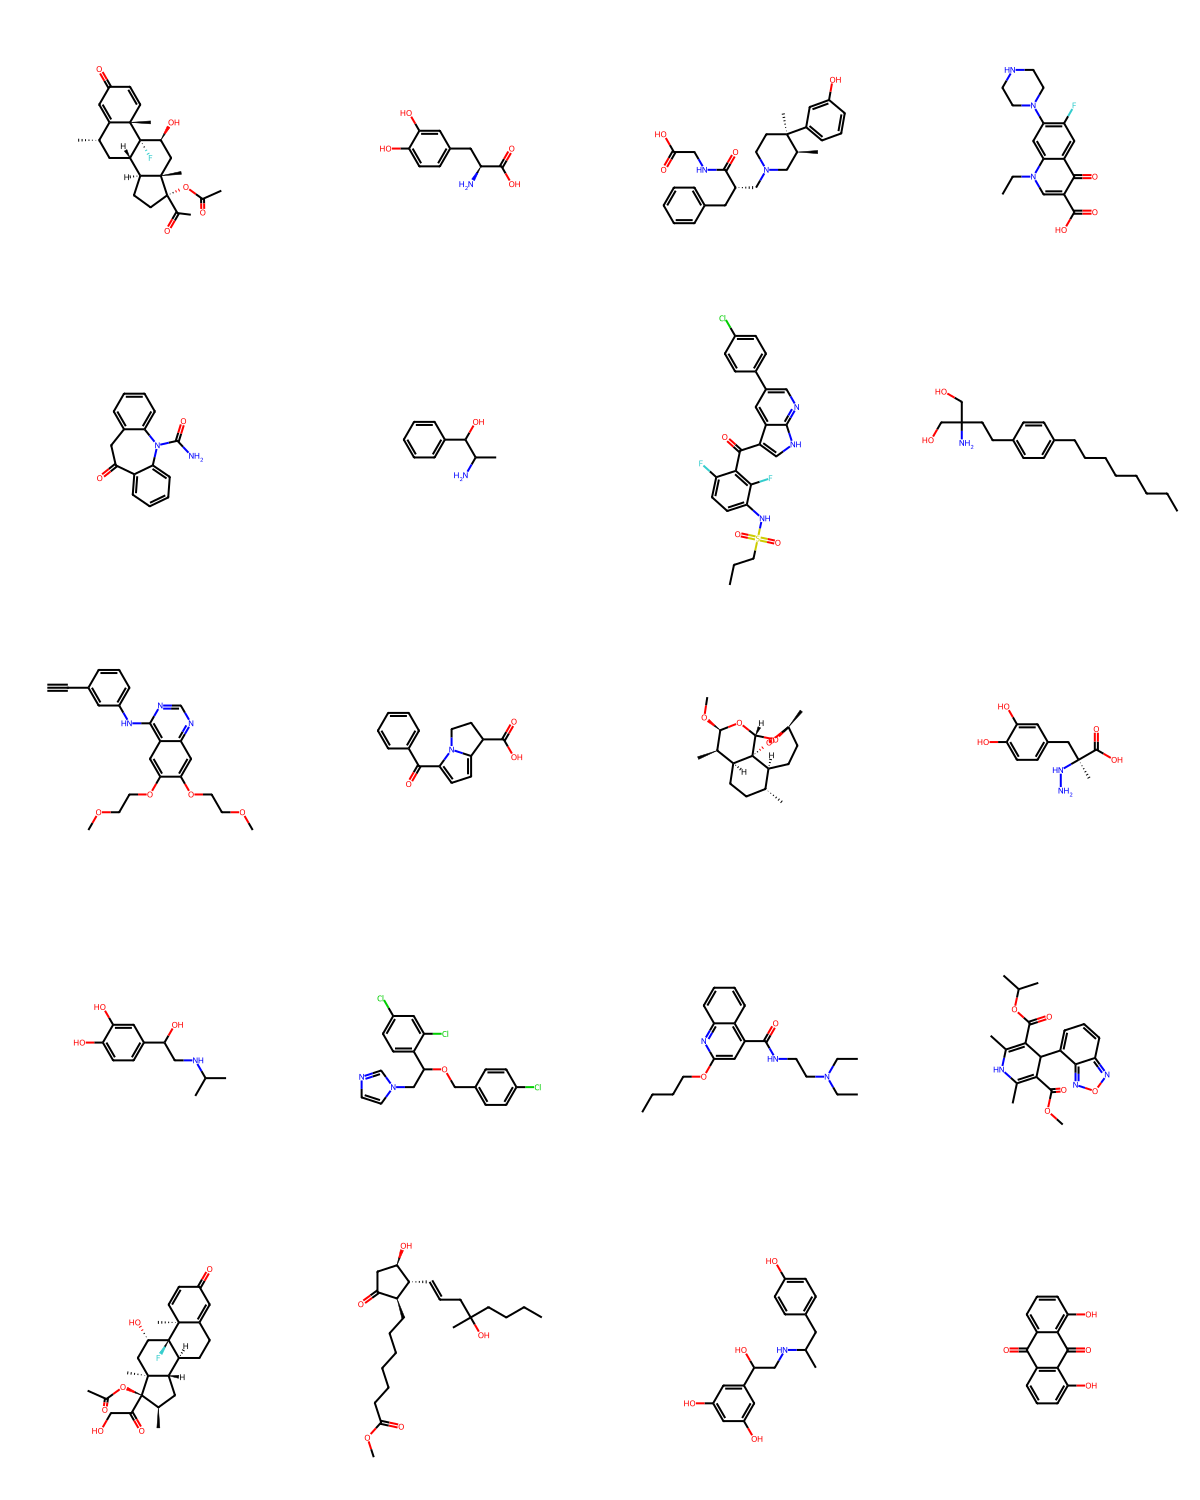

In [ ]:
grid_img = Draw.MolsToGridImage(list(sdmol)[:20], subImgSize=(300, 300), molsPerRow=4)
grid_img

Converting molecules from mol object to SMILES using an excel file

In [ ]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>


In [ ]:
mol_0 = df['Mol'][0]

In [ ]:
Chem.MolToSmiles(mol_0)

'O=CN1CCCCC1'

In [ ]:
mol_to_smiles = []
for mol in df['Mol'][:16]:
  smiles = Chem.MolToSmiles(mol)
  mol_to_smiles.append(smiles)

In [ ]:
mol_to_smiles

['O=CN1CCCCC1',
 'CCN(C=O)CC',
 'CCC(=O)N(C)C',
 'O=C1CCCN1',
 'CCC(=O)NC',
 'CCNC(C)=O',
 'CCN(CC)C(=O)N(CC)CC',
 'CCCCCCCCCCCC#N',
 'CCCCCCCCCCC#N',
 'CC(C)(C)C#N',
 'CCCCCC#N',
 'CCCCC#N',
 'N#CCCl',
 'CC(C)(C)[N+](=O)[O-]',
 'CC(C)[N+](=O)[O-]',
 'CN1CCCCC1']

Converting Mol objects to SMILES using SDF files

In [ ]:
sdmol = Chem.SDMolSupplier('/approved_drugs.sdf')
drug_smiles = []
for mol in sdmol:
  smiles = Chem.MolToSmiles(mol)
  drug_smiles.append(smiles)

drug_smiles[:16]

['CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
 'N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O',
 'C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@@]1(C)c1cccc(O)c1',
 'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21',
 'NC(=O)N1c2ccccc2CC(=O)c2ccccc21',
 'CC(N)C(O)c1ccccc1',
 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 'CCCCCCCCc1ccc(CCC(N)(CO)CO)cc1',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O',
 'CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C@@H]([C@H]1C)[C@@]24OO3',
 'C[C@@](Cc1ccc(O)c(O)c1)(NN)C(=O)O',
 'CC(C)NCC(O)c1ccc(O)c(O)c1',
 'Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)cc1',
 'CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1',
 'COC(=O)C1=C(C)NC(C)=C(C(=O)OC(C)C)C1c1cccc2nonc12']

Generating 2D and 3D geometries

In [ ]:
df.head(10)

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>
5,n-ethylacetamide,CC(NCC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f40b0>
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4120>
7,n-dodecanenitrile,CCCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4190>
8,n-undecanenitrile,CCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4200>
9,trimethylacetonitrile,CC(C)(C)C#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4270>


In [ ]:
m = Chem.MolFromSmiles('O=C(N(CC)CC)N(CC)CC')

In [ ]:
m.SetProp('_Name', 'mol_2D')
AllChem.Compute2DCoords(m)


0

In [ ]:
print(Chem.MolToMolBlock(m))

mol_2D
     RDKit          2D

 12 11  0  0  0  0  0  0  0  0999 V2000
    1.2215    1.9902    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.6223    0.6151    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5136   -0.5914    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.0041   -0.4228    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6033    0.9523    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9143   -1.9665    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5762   -2.1351    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8682    0.4465    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7594    1.6530    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2499    1.4844    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4674   -0.9286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9579   -1.0972    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  3  6  1  0
  6  7  1  0
  2  8  1  

In [ ]:
print(Chem.MolToMolBlock(m), file = open('mol_2d.sdf', 'w+'))

In [ ]:
m_2 = Chem.MolFromSmiles('O=C1CCCN1')

In [ ]:
m_2.SetProp('_Name', 'mol_3D')
m_2_h = Chem.AddHs(m_2)
AllChem.EmbedMolecule(m_2_h)

0

In [ ]:
print(Chem.MolToMolBlock(m_2_h))

mol_3D
     RDKit          3D

 13 13  0  0  0  0  0  0  0  0999 V2000
    2.4781    0.5138    0.6078 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3392    0.2030    0.1144 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6274   -1.0534   -0.3161 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7677   -0.7693    0.1612 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9635    0.7320    0.1172 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3798    1.2469   -0.1510 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.5755   -0.9947   -1.4328 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.0868   -1.9488    0.0818 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8190   -1.0833    1.2356 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5289   -1.2880   -0.4660 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7136    1.0593   -0.5982 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2047    1.1379    1.1301 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5106    2.2447   -0.4840 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3

In [ ]:
print(Chem.MolToMolBlock(m_2_h), file = open('mol_3d.sdf', 'w+'))

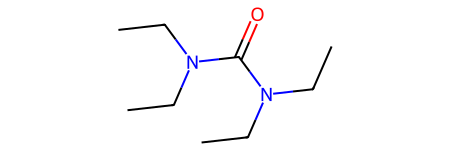

In [ ]:
m

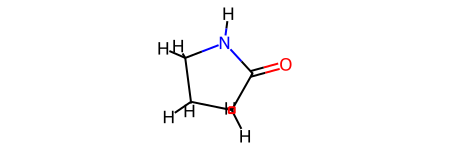

In [ ]:
m_2_h

Optimizing molecules

In [ ]:
AllChem.MMFFOptimizeMoleculeConfs(m_2_h)

[(0, -24.264638528921086)]

Getting Atom_centric properties of the molecule

In [ ]:
df.head(15)

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>
5,n-ethylacetamide,CC(NCC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f40b0>
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4120>
7,n-dodecanenitrile,CCCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4190>
8,n-undecanenitrile,CCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4200>
9,trimethylacetonitrile,CC(C)(C)C#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4270>


In [ ]:
m_3 = Chem.MolFromSmiles('CC(C)[N+]([O-])=O')

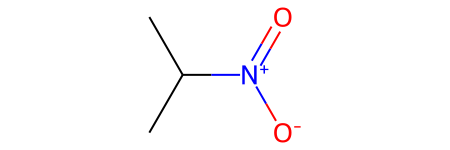

In [ ]:
m_3

In [ ]:
atoms_list_m_3 = list(m_3.GetAtoms())

In [ ]:
atoms_list_m_3[0].GetSymbol()

'C'

In [ ]:
atom_list = []
for i in range(len(atoms_list_m_3)):
  atom_list.append(atoms_list_m_3[i].GetSymbol())

In [ ]:
atom_list

['C', 'C', 'C', 'N', 'O', 'O']

In [ ]:
m_3.GetAtomWithIdx(0).GetSymbol()

'C'

In [ ]:
m_3.GetAtomWithIdx(3).GetAtomicNum()

7

In [ ]:
m_3.GetAtomWithIdx(3).GetAtomMapNum()

0

In [ ]:
m_3.GetAtomWithIdx(3).GetIsAromatic()

False

In [ ]:
m_3.GetAtomWithIdx(3).GetBonds()

(<rdkit.Chem.rdchem.Bond at 0x7e73d2256a40>,
 <rdkit.Chem.rdchem.Bond at 0x7e73d2256b20>)

In [ ]:
m_3.GetBondBetweenAtoms(1,2).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [ ]:
m_3.GetBondBetweenAtoms(1,2).GetBondDir()

rdkit.Chem.rdchem.BondDir.NONE

In [ ]:
for atom in m_3.GetAtoms():
  print(atom.GetIdx(), atom.GetAtomicNum(), atom.GetSymbol(), atom.GetHybridization())

0 6 C SP3
1 6 C SP3
2 6 C SP3
3 7 N SP2
4 8 O SP2
5 8 O SP2


Highlighting molecules

In [ ]:
df['Smiles'][42]

'C#CN(C(C)C)C(C)C'

In [ ]:
m_4 = df['Mol'][42]

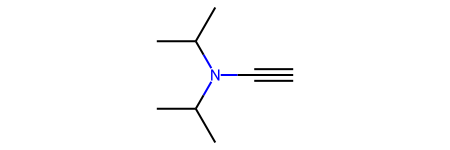

In [ ]:
m_4

In [ ]:
patt = Chem.MolFromSmarts('C#CN')

In [ ]:
hit_atoms = m_4.GetSubstructMatch(patt)

In [ ]:
hit_atoms

(0, 1, 2)

In [ ]:
for atom in m_4.GetAtoms():
  print(atom.GetIdx(), atom.GetSymbol())

0 C
1 C
2 N
3 C
4 C
5 C
6 C
7 C
8 C


In [ ]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, m_4, highlightAtoms = hit_atoms)


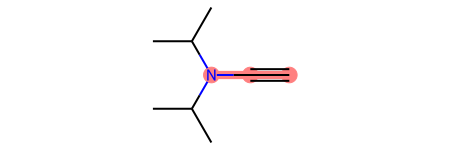

In [ ]:
m_4

In [ ]:
patt = Chem.MolFromSmarts('C#CN')

for mol in df['Mol']:
  hit_ats = list(mol.GetSubstructMatch(patt))
  d = rdMolDraw2D.MolDraw2DSVG(400, 400)
  rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms = hit_ats)

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,
1,"N,N-diethylformamide",O=CN(CC)CC,
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,
3,pyrrolidin-2-one,O=C1CCCN1,
4,N-methylpropionamide,CNC(CC)=O,
5,n-ethylacetamide,CC(NCC)=O,
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,
7,n-dodecanenitrile,CCCCCCCCCCCC#N,
8,n-undecanenitrile,CCCCCCCCCCC#N,
9,trimethylacetonitrile,CC(C)(C)C#N,

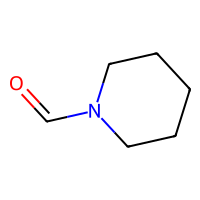
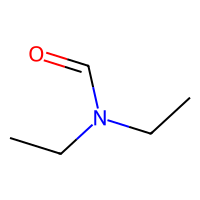
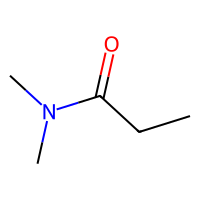
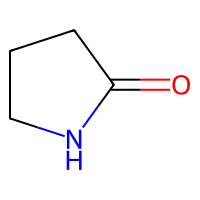
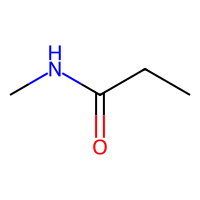
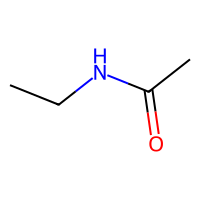
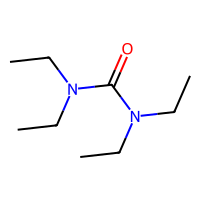
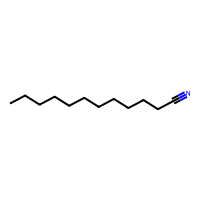
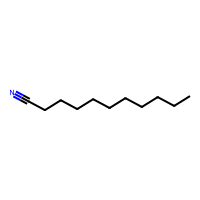
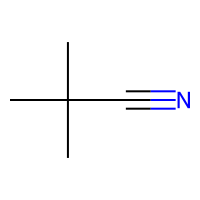
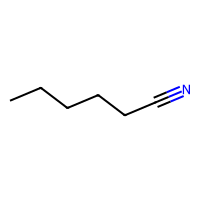
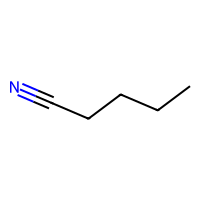
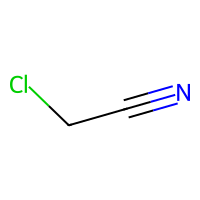
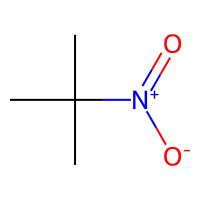
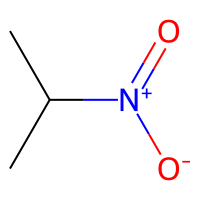
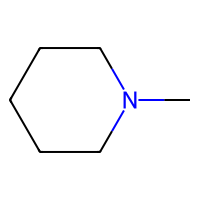
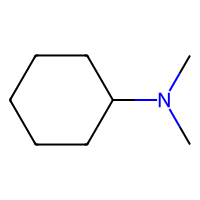
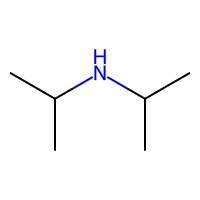
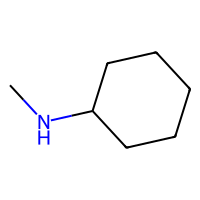
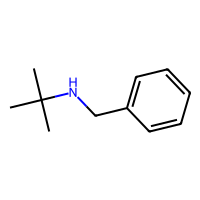
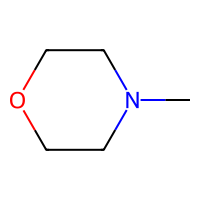
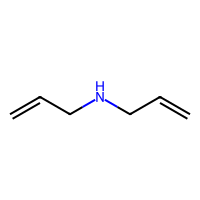
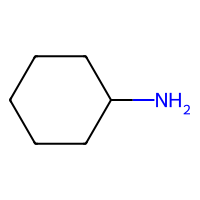
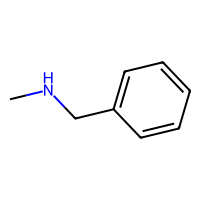
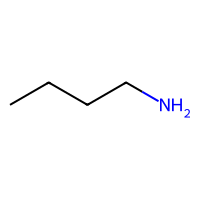
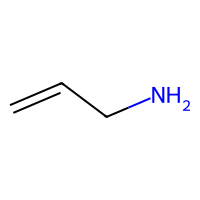
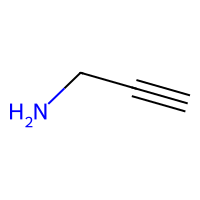
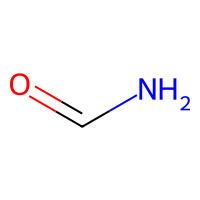
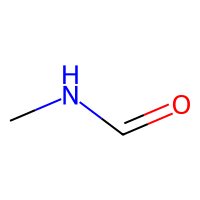
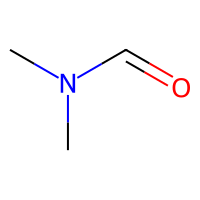
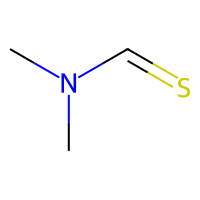
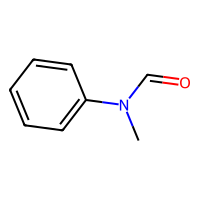
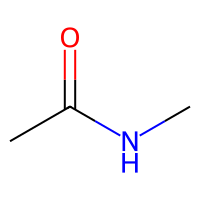
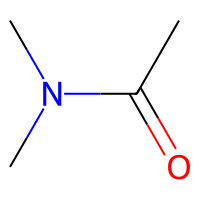
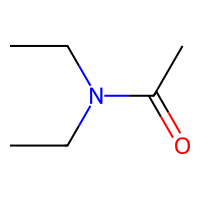
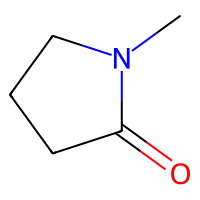
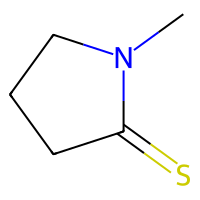
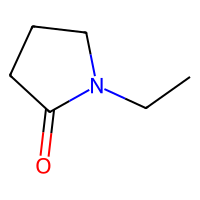
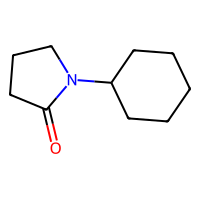
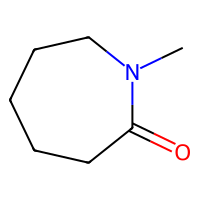
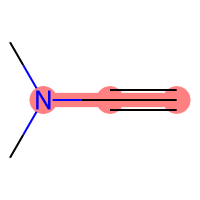
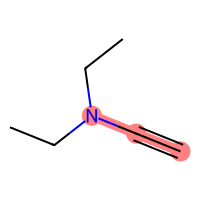
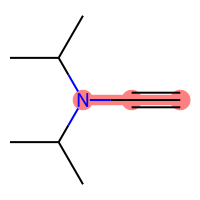
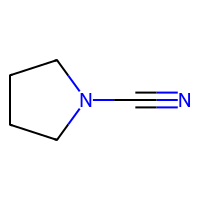
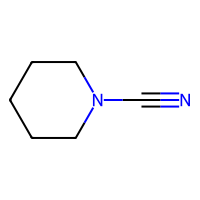
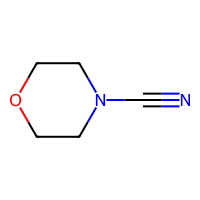
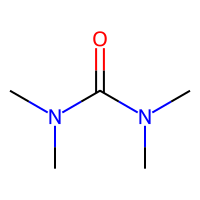
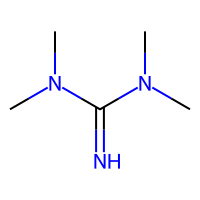
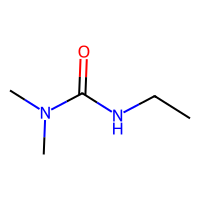
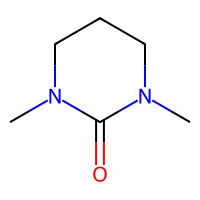

In [ ]:
df

Substructure search

In [ ]:
pattern = Chem.MolFromSmarts('NC=O')

matches = [mol for mol in df['Mol'] if mol.HasSubstructMatch(pattern)]

matches

In [ ]:
len(matches)

21

In [ ]:
df[df['Mol'].isin(matches)]

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>
5,n-ethylacetamide,CC(NCC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f40b0>
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4120>
27,formamide,NC([H])=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4a50>
28,N-methylformamide,O=C([H])NC,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4ac0>
29,DMF,O=C([H])N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4b30>


In [ ]:
submatch_img =Draw.MolsToGridImage(matches,
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends = [name for name in df['Name']]
                         )

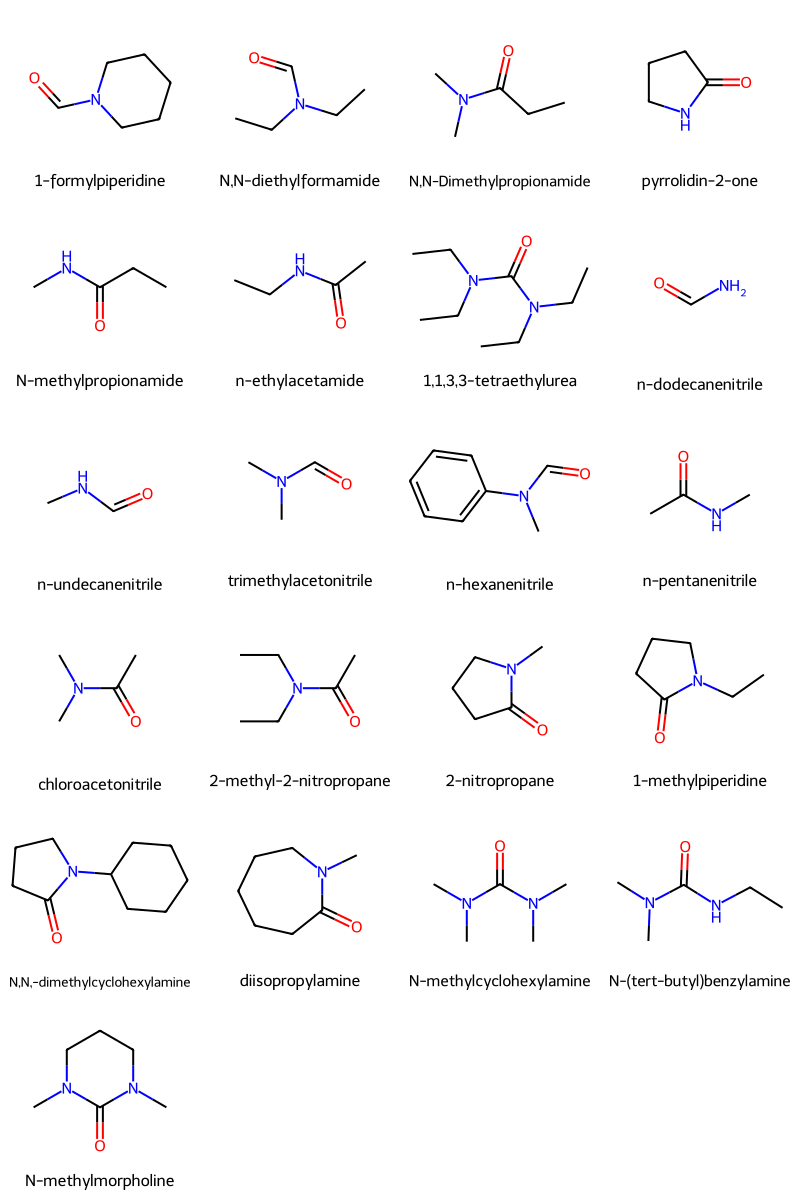

In [ ]:
submatch_img

Deleting/Replacing Patterns

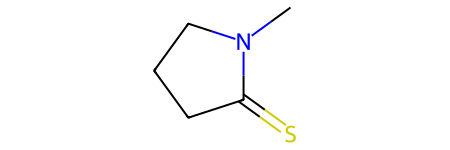

In [ ]:
df['Mol'][36]

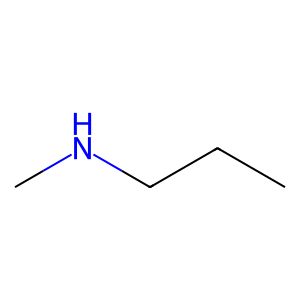

In [ ]:
del_pattern = Chem.MolFromSmarts('C=S')
dm = AllChem.DeleteSubstructs(df['Mol'][36], del_pattern)

img = Draw.MolToImage(dm)
display(img)

In [ ]:
rep_pattern = Chem.MolFromSmarts('C=o')

rm = AllChem.ReplaceSubstructs(df['Mol'][36], del_pattern, rep_pattern)

rm #Since rm is in the form of tuples, while converting it to image, we need to specify index

(<rdkit.Chem.rdchem.Mol at 0x7e73d2257ca0>,)

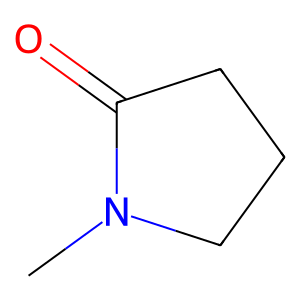

In [ ]:
img = Draw.MolToImage(rm[0])
display(img)

Fragmentation

In [ ]:
frag_mol = sdmol[16]

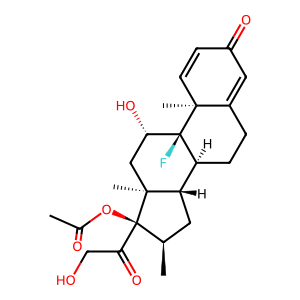

In [ ]:
fmol = Draw.MolToImage(frag_mol)
display(fmol)

In [ ]:
fragms = sorted(BRICS.BRICSDecompose(frag_mol))
fragms

['[1*]C(C)=O',
 '[15*]C1([15*])[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
 '[3*]O[3*]',
 '[4*][C@]1([15*])[C@H](C)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
 '[6*]C(=O)CO']

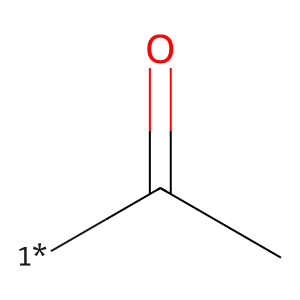

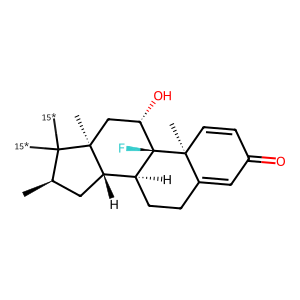

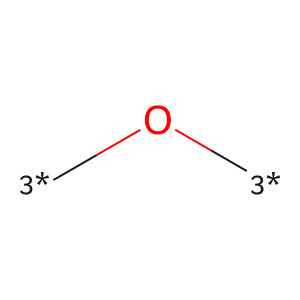

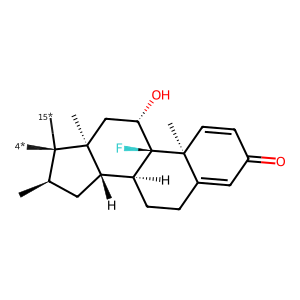

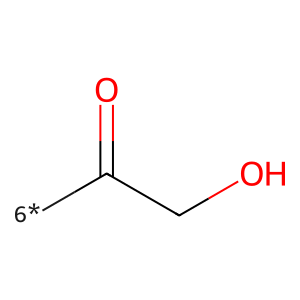

In [ ]:
frag_mols = []
for frag in fragms:
  mol = Chem.MolFromSmiles(frag)
  image = Draw.MolToImage(mol)
  display(image)
  frag_mols.append(mol)


In [ ]:
rb = BRICS.BRICSBuild(frag_mols)
rb

<generator object BRICSBuild at 0x7e73d2256ff0>

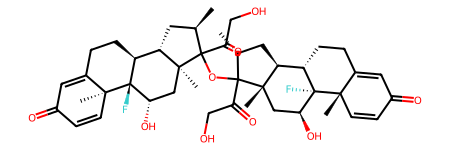

In [ ]:
prods = [next(rb) for x in range(5)]
prods[4]

Generating Fingerprints

1. MACCS keys

In [ ]:
fingp_mol = df['Mol'][24]

In [ ]:
m_fingp = MACCSkeys.GenMACCSKeys(fingp_mol)

In [ ]:
m_fingp

In [ ]:
m_fingp_arr = np.array(m_fingp)
print(m_fingp_arr)
Counter(m_fingp_arr)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0]


Counter({0: 150, 1: 17})

In [ ]:
print(f'The bits are on at position {list(m_fingp.GetOnBits())}')

The bits are on at position [82, 84, 90, 100, 104, 111, 114, 115, 116, 118, 147, 151, 153, 155, 158, 160, 161]


In [ ]:
#Getting MACCS Keys for the entire dataset
maccs_bv = [MACCSkeys.GenMACCSKeys(mol) for mol in df['Mol']]

In [ ]:
df_maccs = pd.concat([df, pd.DataFrame(np.array(maccs_bv))], axis=1)

In [ ]:
df_maccs.head()

,Name,Smiles,Mol,0,1,2,3,4,5,6,...,157,158,159,160,161,162,163,164,165,166
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,0
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


In [ ]:
df_maccs.drop('Mol', axis=1).to_excel('MACCS_Keys.xlsx', index=None)

Morgan Fingerprints

In [ ]:
type(df['Mol'][15])

rdkit.Chem.rdchem.Mol

In [ ]:
#Generating morgan fingerprint for a molecule and storing it as a bit vector
bi = {}
mf_bv = AllChem.GetMorganFingerprintAsBitVect(df['Mol'][15], radius=2, nBits = 2048, bitInfo = bi)

mf_arr = np.array(mf_bv)
print(mf_arr)

Counter(mf_arr)

[0 0 1 ... 0 0 0]


Counter({0: 2037, 1: 11})

In [ ]:
print(f'The bits are at position {list(mf_bv.GetOnBits())}')

The bits are at position [2, 207, 834, 926, 935, 1028, 1057, 1145, 1236, 1480, 1998]


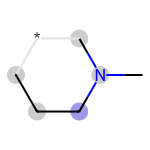

In [ ]:
#Visualizing the information stored in bits
Draw.DrawMorganBit(df['Mol'][15], bitId=834, bitInfo=bi)

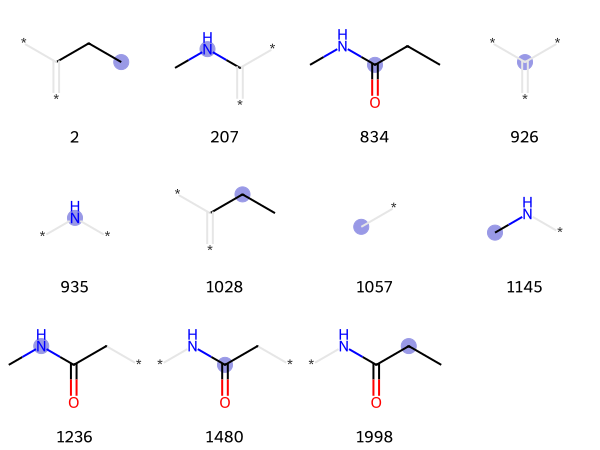

In [ ]:
#Creating a list comprehension for visualizing information stored in onBits
ls = [(df['Mol'][4],x,bi) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(ls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])

In [ ]:
#Generating morgan fingerprints for all the molecules in the dataset
mf_bv_all = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048, bitInfo = bi) for mol in df['Mol']]

#Adding the morgan fingerprints to the dataframe
df = pd.concat([df, pd.DataFrame(np.array(mf_bv_all))], axis=1)

In [ ]:
df.drop('Mol', axis=1).head()

,Name,Smiles,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1-formylpiperidine,O=CN1CCCCC1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"N,N-diethylformamide",O=CN(CC)CC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pyrrolidin-2-one,O=C1CCCN1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N-methylpropionamide,CNC(CC)=O,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Generating Similarity Maps using Fingerprints

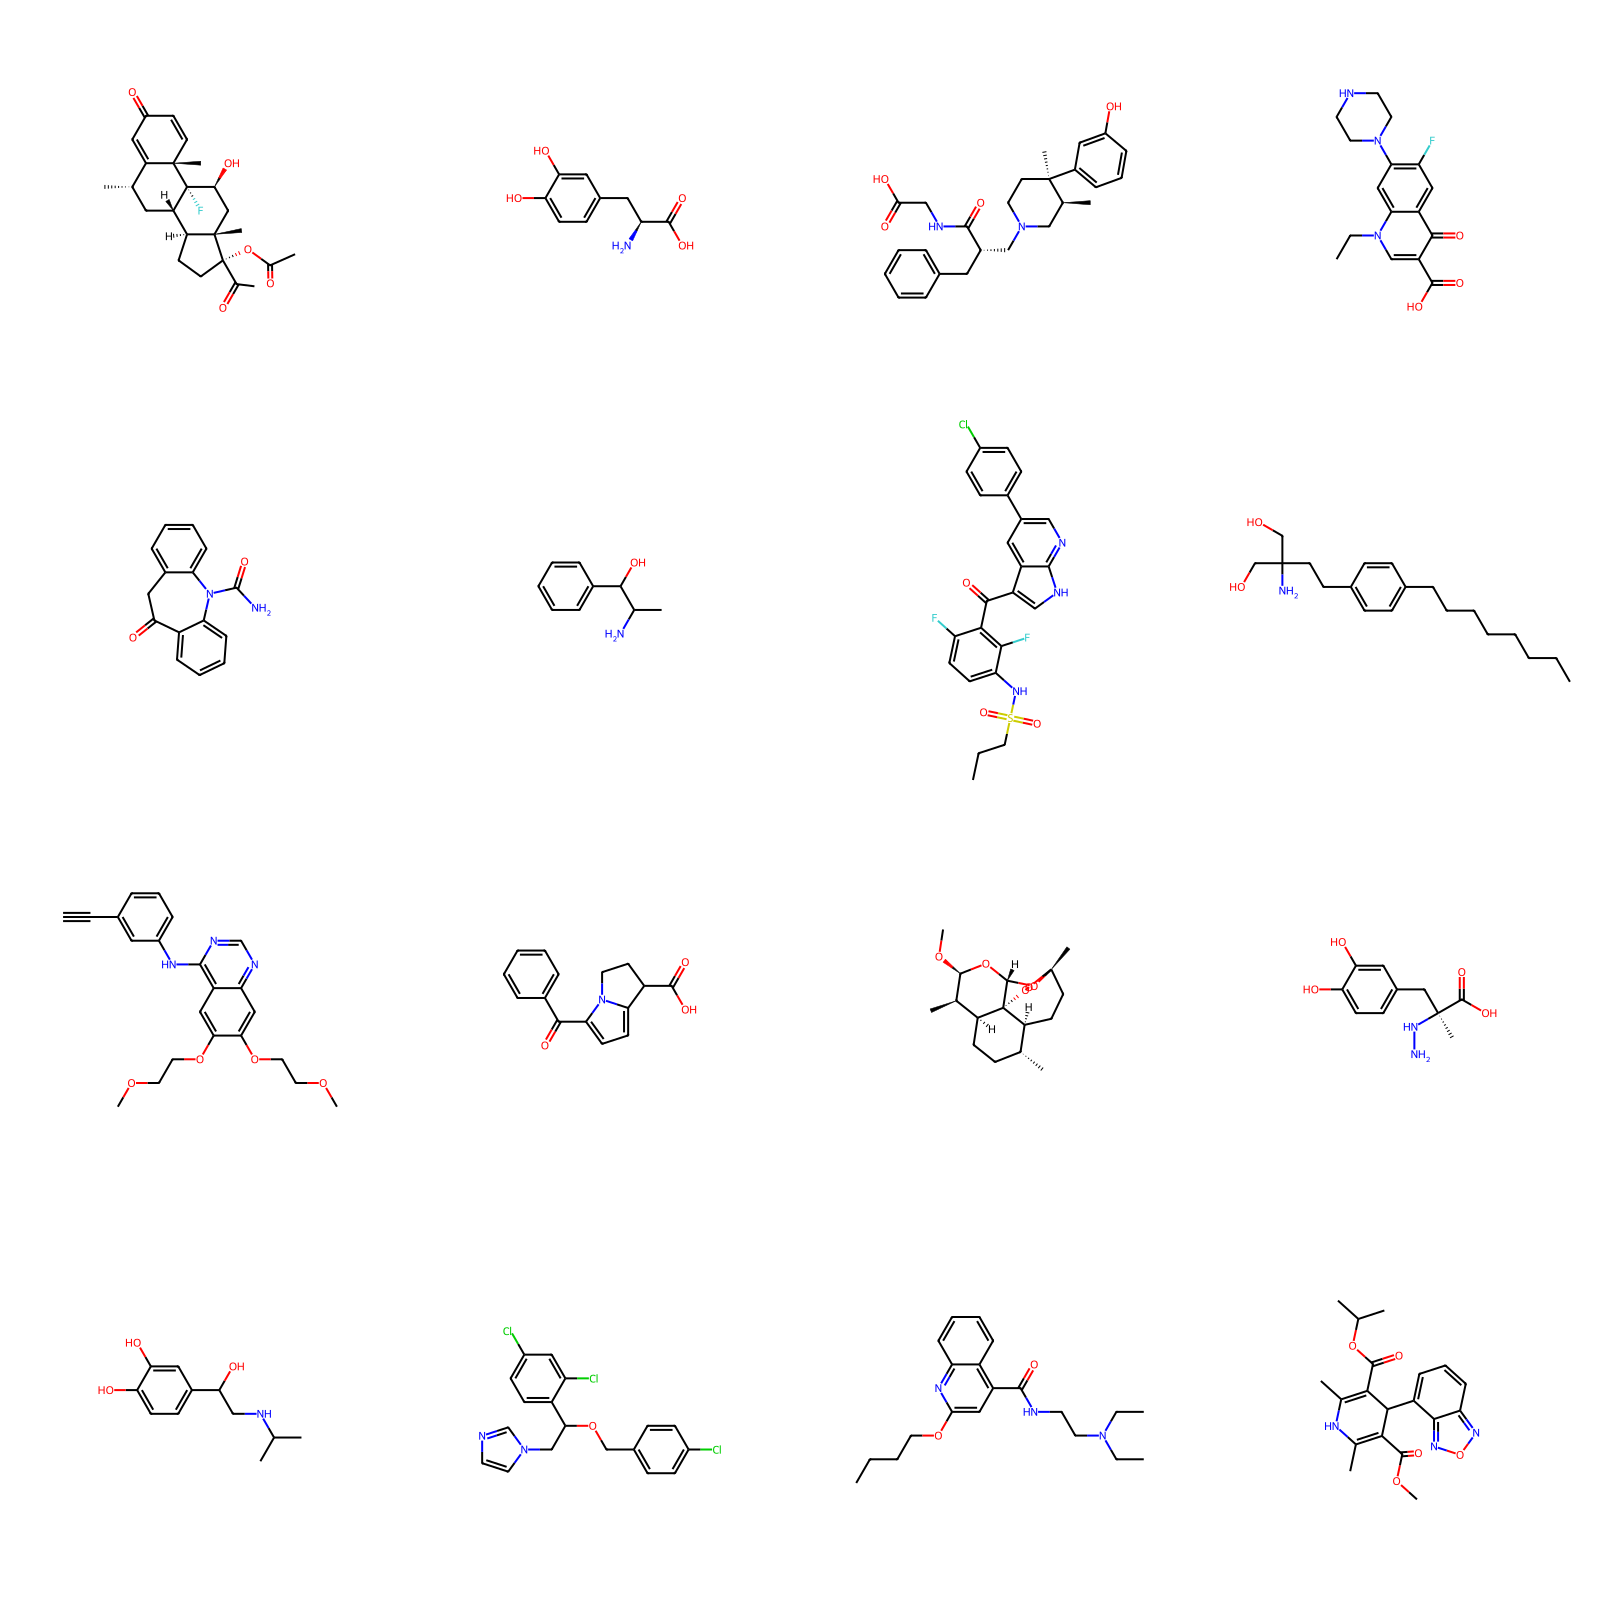

In [ ]:
img = Draw.MolsToGridImage(list(sdmol)[:16], molsPerRow=4,  subImgSize=(400, 400))
img

In [ ]:
#Selecting a reference molecule
ref_mol = sdmol[14]

#Selecting molecule for which similarity map is to generated
mol = sdmol[8]

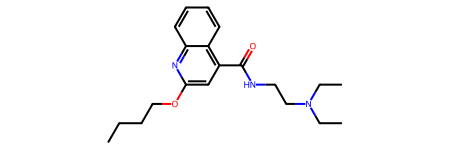

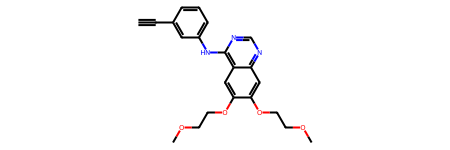

In [ ]:
display(ref_mol, mol)

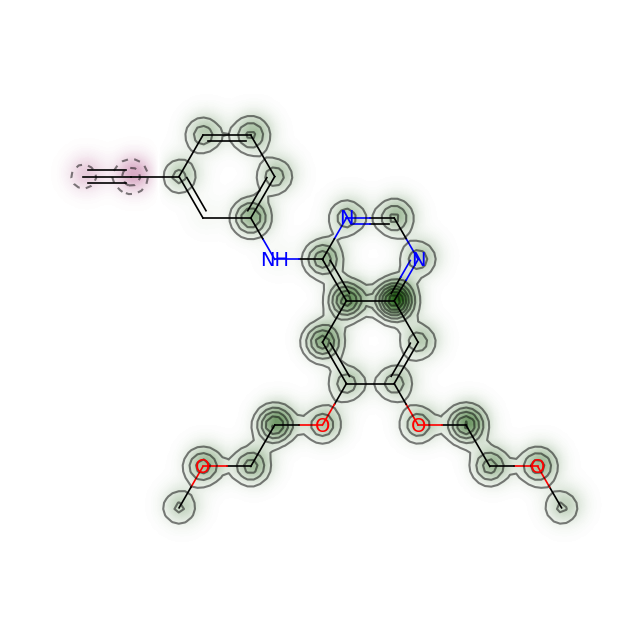

In [ ]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol, SimilarityMaps.GetMorganFingerprint) #Morgan Fingerprint

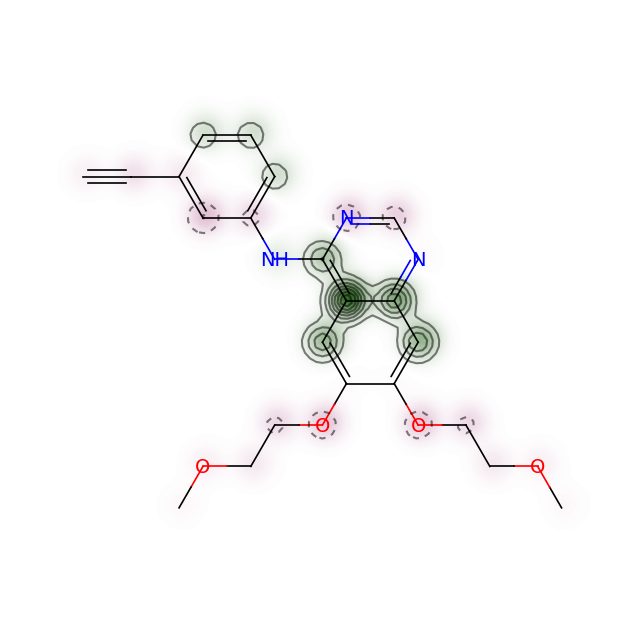

In [ ]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol, SimilarityMaps.GetTTFingerprint) #Topological Torsion Fingerprint

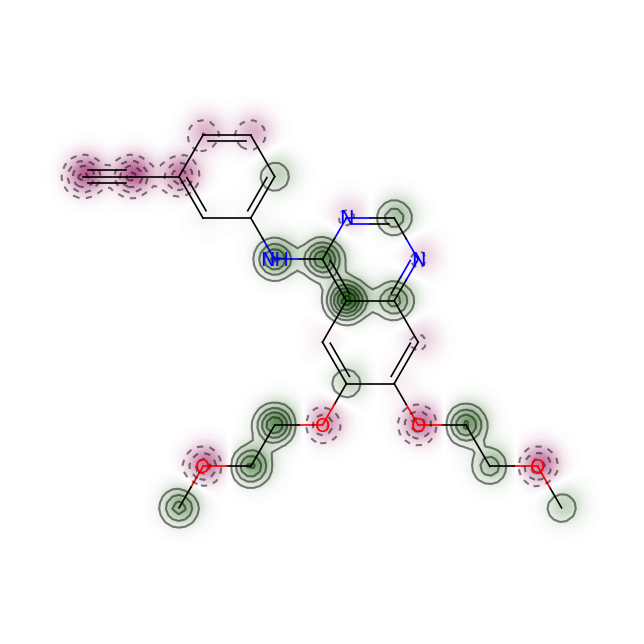

In [ ]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol, SimilarityMaps.GetAPFingerprint) #Atom-Pair Fingerprint

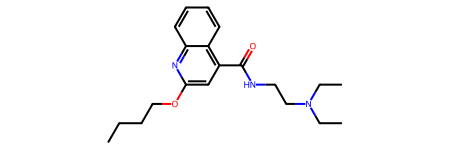

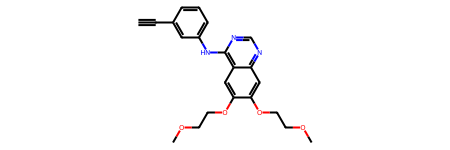

In [ ]:
display(ref_mol, mol)

Tanimoto Similarity
Also known as the Jaccard Index, which is a measure of the similarity between two chemical structures based on their molecular fingerprints

In [ ]:
#First we need to calculate fingerprints for the chemical structures to be compared. Lets choose Morgan Fingerprints.
morgf_ref_mol = AllChem.GetMorganFingerprintAsBitVect(ref_mol, radius=2, nBits=2048)
morgf_mol = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

In [ ]:
TanimotoSimilarity(morgf_ref_mol, morgf_mol)

0.20253164556962025

In [ ]:
#Lets try calculating the Tanimoto Similarity using another method for generating Fingerprints. Let's consider MACCS keys.
mk_ref_mol = MACCSkeys.GenMACCSKeys(ref_mol)
mk_mol = MACCSkeys.GenMACCSKeys(mol)

In [ ]:
TanimotoSimilarity(mk_ref_mol, mk_mol)

0.5223880597014925

In [ ]:
DiceSimilarity(morgf_ref_mol, morgf_mol)

0.3368421052631579

In [ ]:
DiceSimilarity(mk_ref_mol, mk_mol)

0.6862745098039216

Comapring Similarity of a molecule with the whole dataset

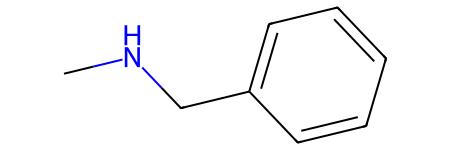

In [ ]:
#Selecting a molecule with the index 23
df['Mol'][23]

In [ ]:
#Get Morgan Fingerprints for all the molecules from the dataset
morgf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in df['Mol']]


In [ ]:
df['ts_coefficient'] = [TanimotoSimilarity(morgf_bv[23], x) for x in morgf_bv]

In [ ]:
df.head(25)

,Name,Smiles,Mol,0,1,2,3,4,5,6,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,ts_coefficient
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.034483
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071429
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.068966
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032258
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.148148
5,n-ethylacetamide,CC(NCC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f40b0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.107143
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4120>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071429
7,n-dodecanenitrile,CCCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4190>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.100000
8,n-undecanenitrile,CCCCCCCCCCC#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4200>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.100000
9,trimethylacetonitrile,CC(C)(C)C#N,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4270>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.083333


Generating 2D and 3D Descriptors

In [ ]:
df_1 = pd.read_excel('/nitrogencompounds.xlsx')
df_1.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [ ]:
mol_list = []

for smile in df_1['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df_1 = pd.concat([df_1, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

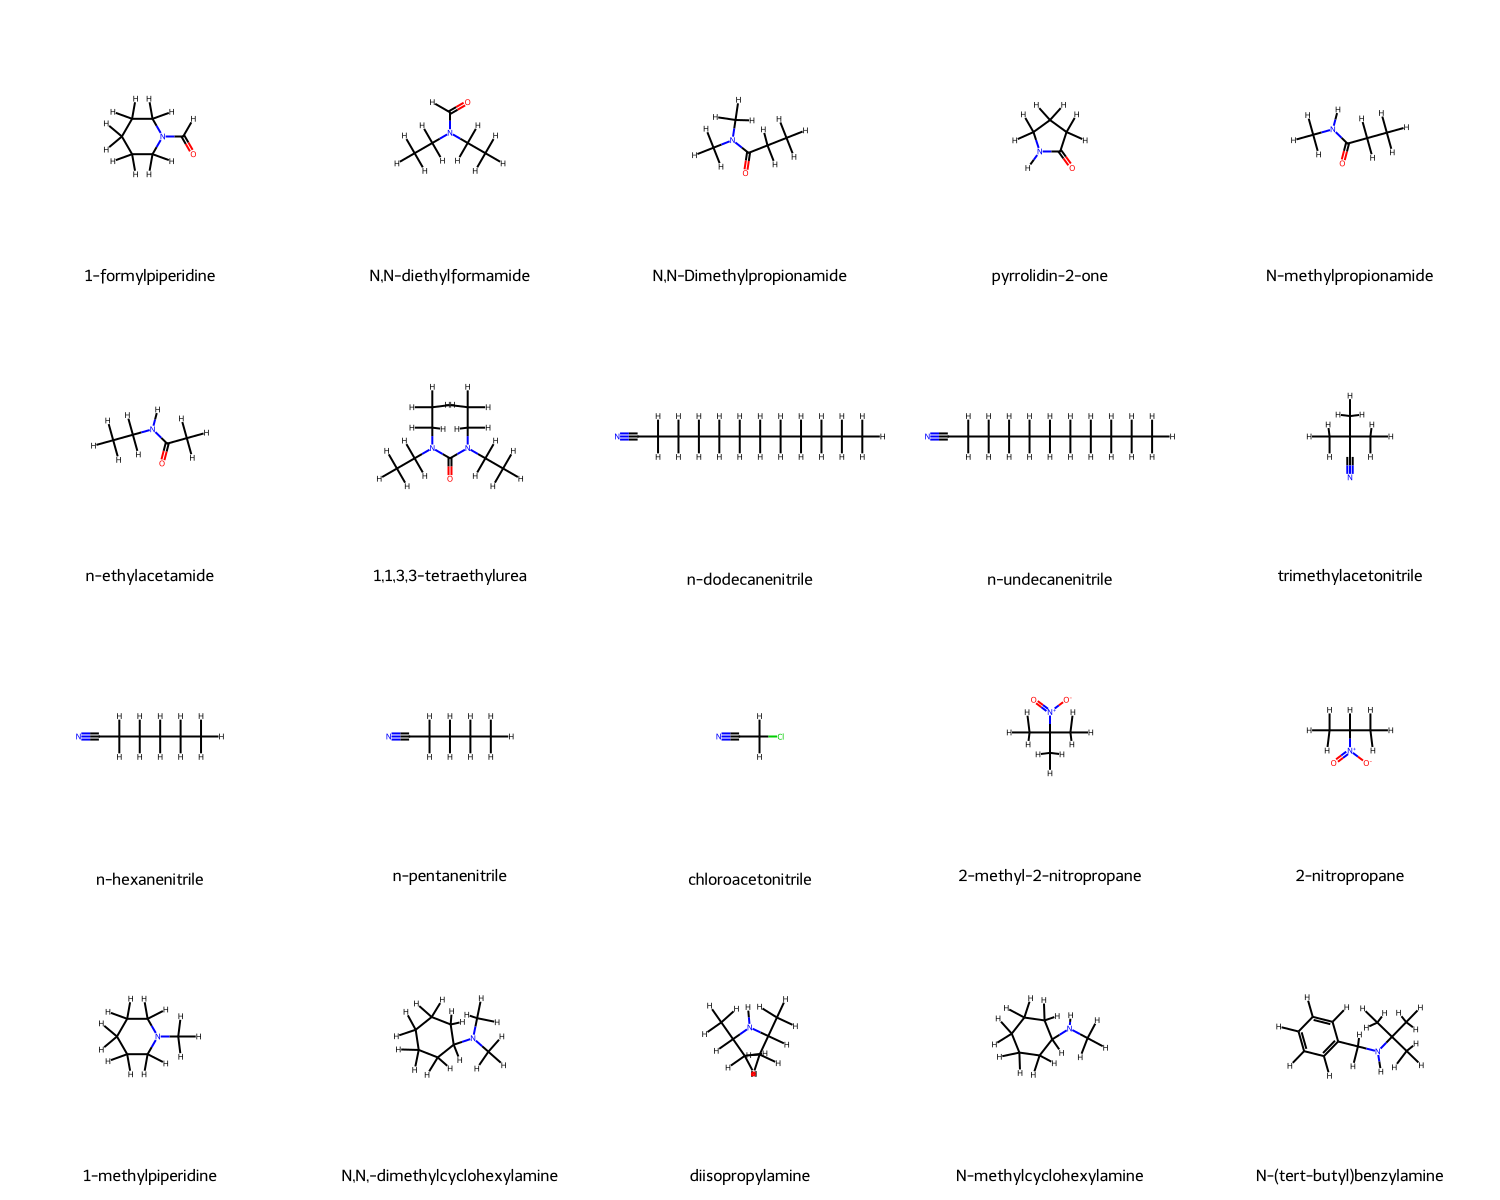

In [ ]:
img = Draw.MolsToGridImage(df_1['Mol'][:20], subImgSize=(300,300), molsPerRow=5, legends=[x for x in df['Name'][:20]])

img

2D Descriptors

In [ ]:
mol = df_1['Mol'][32]

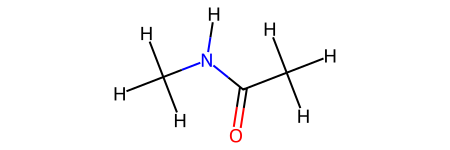

In [ ]:
mol

In [ ]:
#Calculate maximum absolute partial charges for a single molecule
Descriptors.MaxAbsPartialCharge(mol)

0.3594196242661188

In [ ]:
#Calculate molecular weight
Descriptors.MolWt(mol)

73.09499999999996

In [ ]:
#Calculating all the descriptors from the module
des = Descriptors.CalcMolDescriptors(mol)
des_df = pd.DataFrame([des])
des_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.627153,10.627153,0.513889,-3.073264,0.420717,32.4,73.095,66.039,73.052764,30,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Calculating all the descriptors for all the molecules of the dataset
des_list = []

for mol in df_1['Mol']:
  des = Descriptors.CalcMolDescriptors(mol)
  des_list.append(des)

In [ ]:
Final_df = pd.concat([df_1, pd.DataFrame(des_list)], axis=1)

In [ ]:
Final_df.head()

,Name,Smiles,Mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d0611000>,11.073438,11.073438,0.540347,-3.556597,0.456574,72.500000,113.160,...,0,0,0,0,0,0,0,0,0,0
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d0610f90>,10.943194,10.943194,0.722222,-3.621296,0.473496,39.142857,101.149,...,0,0,0,0,0,0,0,0,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d0611690>,11.575903,11.575903,0.702014,-3.601389,0.470276,39.142857,101.149,...,0,0,0,0,0,0,0,0,0,0
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d0611460>,10.941528,10.941528,0.284722,-3.015046,0.436836,65.000000,85.106,...,0,0,0,0,0,0,0,0,0,0
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d06110e0>,11.101528,11.101528,0.639514,-3.385764,0.484039,36.333333,87.122,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Final_df.drop('Mol', axis=1).to_excel('final.xlsx', index=None)

3D Descriptors

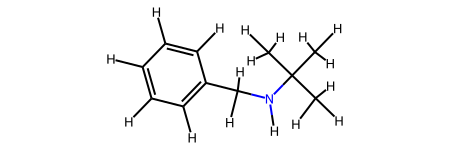

In [ ]:
mol

In [ ]:
AllChem.EmbedMolecule(mol)

0

In [ ]:
Descriptors3D.CalcMolDescriptors3D(mol)

{'PMI1': 210.60860784938998,
 'PMI2': 1176.6052704994108,
 'PMI3': 1249.4749059890048,
 'NPR1': 0.168557693187672,
 'NPR2': 0.941679792735081,
 'RadiusOfGyration': 2.841641075404586,
 'InertialShapeFactor': 0.00447123126804244,
 'Eccentricity': 0.9856917895910722,
 'Asphericity': 0.5804561697697239,
 'SpherocityIndex': 0.25836513451228826,
 'PBF': 0.7165112016835056}

In [ ]:
#Calculating 3D Descriptos for all the moelcules in the dataset
des_list_3D = []

for mol in df['Mol']:
  AllChem.EmbedMolecule(mol)
  des = Descriptors3D.CalcMolDescriptors3D(mol)
  des_list_3D.append(des)

final_3D = pd.concat([df, pd.DataFrame(des_list_3D)], axis=1)

In [ ]:
final_3D.head()

,Name,Smiles,Mol,0,1,2,3,4,5,6,...,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,PBF
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fc30>,0,0,1,0,0,0,0,...,282.269400,361.363610,0.247255,0.781123,1.894865,0.008742,0.968950,0.437276,4.472844e-02,0.208816
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fe60>,0,0,0,0,0,0,0,...,164.173026,253.284975,0.542131,0.648175,1.754987,0.004720,0.840294,0.143689,2.673452e-01,0.480585
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d217fed0>,0,0,0,0,0,0,0,...,176.965326,259.168429,0.408633,0.682820,1.734729,0.006447,0.912699,0.240273,1.380426e-01,0.286306
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7e73d217ff40>,0,0,0,0,0,0,0,...,124.606031,167.269761,0.312895,0.744941,1.484953,0.014233,0.949788,0.341858,8.722455e-02,0.226629
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7e73d21f4040>,0,0,0,0,0,0,0,...,180.425915,223.313728,0.192052,0.807948,1.691497,0.018839,0.981385,0.534496,4.430709e-10,0.000019


Visualization of Descriptors

In [ ]:
img = Draw.MolsToGridImage(list(sdmol)[:16], subImgSize=(300,300), molsPerRow=4)

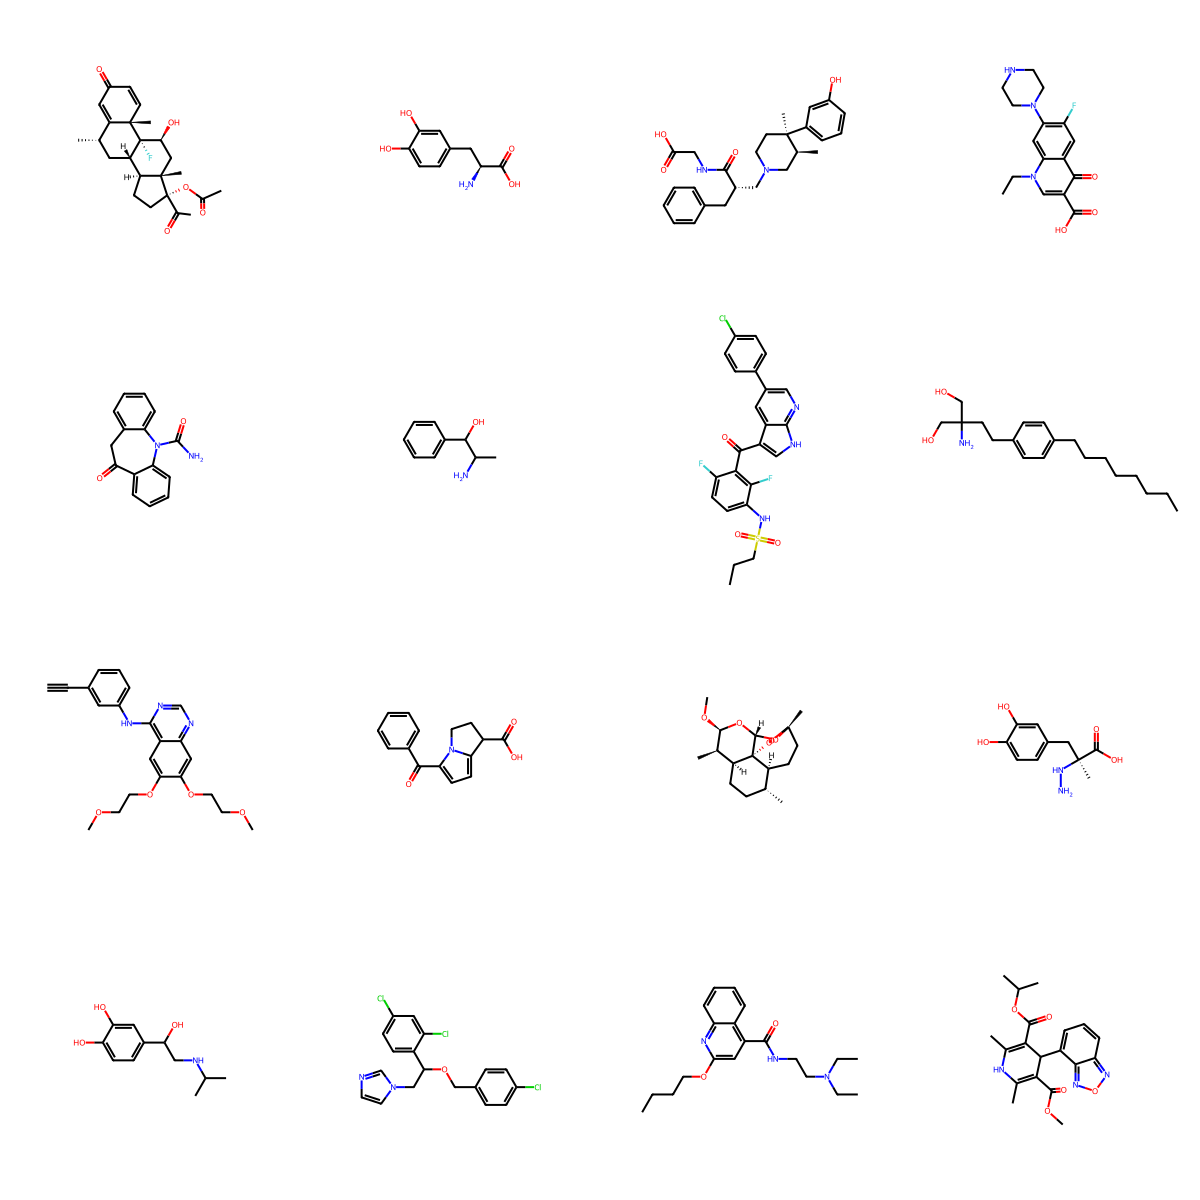

In [ ]:
img

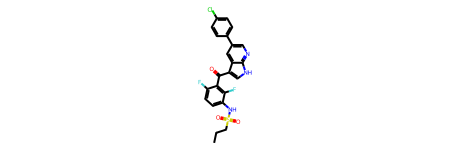

In [ ]:
mol = sdmol[6]
mol

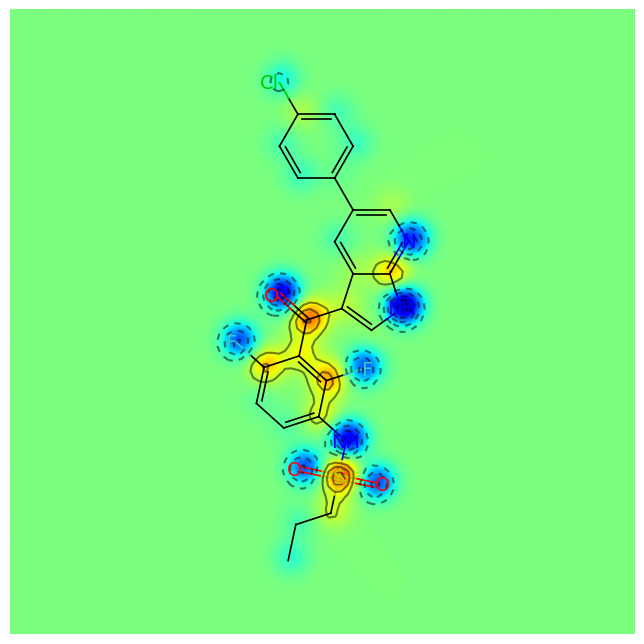

In [ ]:
#Visualization for Gasteiger Charges
AllChem.ComputeGasteigerCharges(mol)
contribs =[mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap = 'jet', contourLines=10)

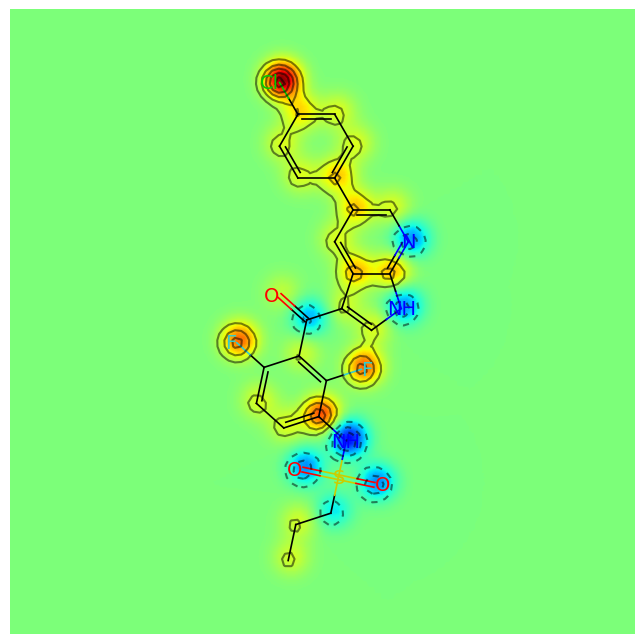

In [ ]:
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, [x for x,y in contribs], colorMap='jet', contourLines=10)

Lipinski's Rule of 5

In [ ]:
drugs = Chem.SDMolSupplier('/drug_candidates.sdf')

In [ ]:
img = Draw.MolsToGridImage(list(drugs), subImgSize=(400,400), molsPerRow=4)

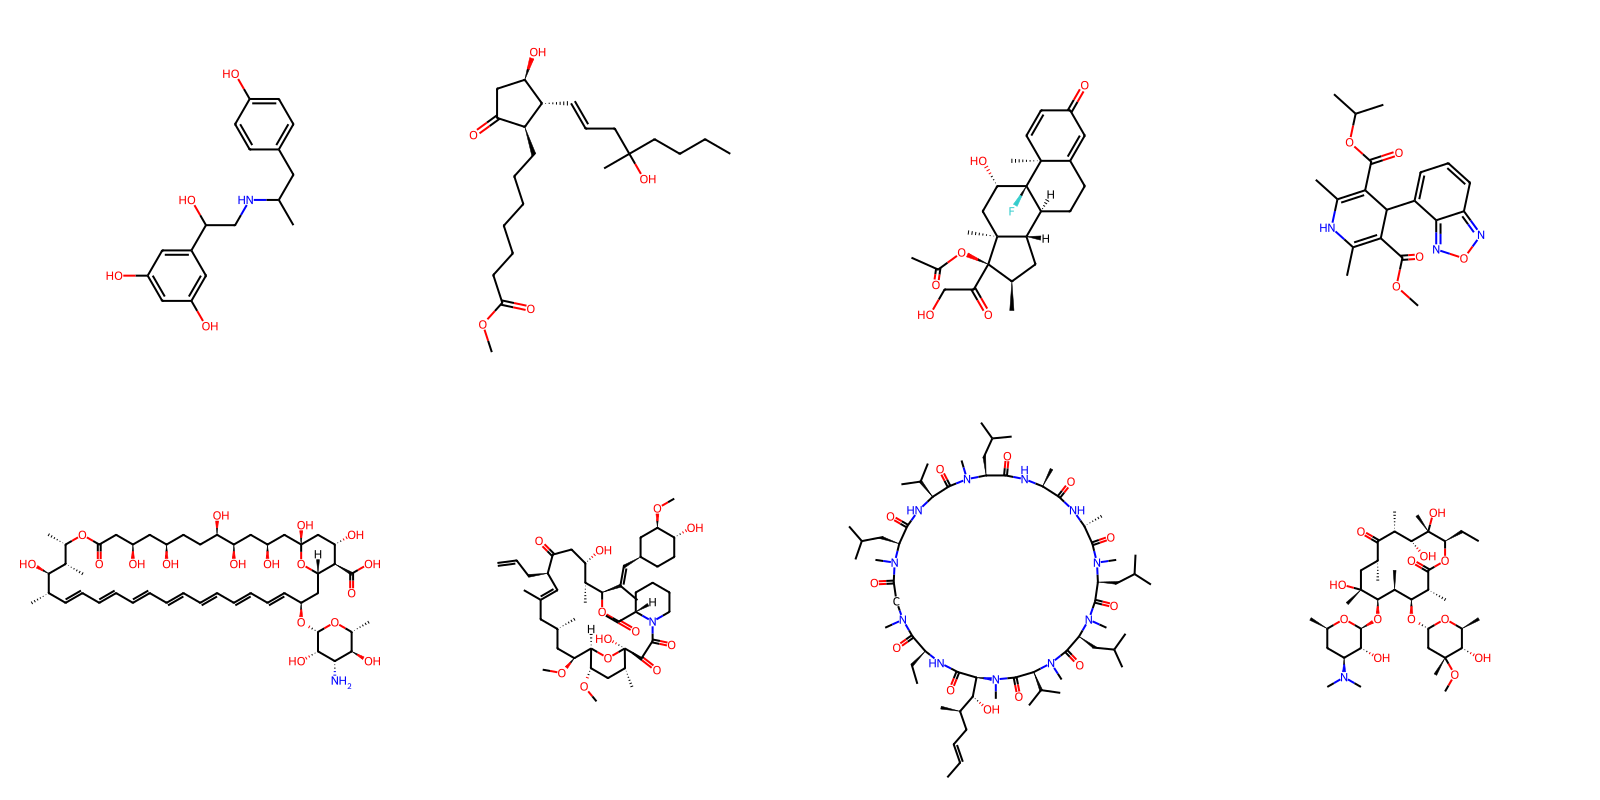

In [ ]:
img

In [ ]:
des_list = []

for mol in drugs:
  des = rdkit.Chem.Descriptors.CalcMolDescriptors(mol)
  des_list.append(des)

drugs_df = pd.concat([pd.Series(drugs), pd.DataFrame(des_list)], axis=1)

In [ ]:
drugs_df.head()

,0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,<rdkit.Chem.rdchem.Mol object at 0x7e73c902bbc0>,10.102988,10.102988,0.077600,-0.819196,0.563111,13.727273,303.358,282.190,303.147058,...,0,0,0,0,0,0,0,0,0,0
1,<rdkit.Chem.rdchem.Mol object at 0x7e73c902b920>,12.240130,12.240130,0.127363,-0.726974,0.286161,25.074074,382.541,344.237,382.271924,...,0,0,0,0,0,0,0,0,4,0
2,<rdkit.Chem.rdchem.Mol object at 0x7e73c902bed0>,17.095462,17.095462,0.084640,-2.021085,0.662117,48.354839,434.504,403.256,434.210467,...,0,0,0,0,0,0,0,0,0,0
3,<rdkit.Chem.rdchem.Mol object at 0x7e73c902a960>,12.885905,12.885905,0.308760,-0.721713,0.818100,17.333333,371.393,350.225,371.148121,...,0,0,0,0,0,0,0,0,0,0
4,<rdkit.Chem.rdchem.Mol object at 0x7e73c902b610>,12.613219,12.613219,0.107125,-2.325406,0.173524,45.492308,924.091,850.507,923.487850,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
drugs_df[['MolWt', 'NOCount', 'NHOHCount', 'MolLogP']].describe()

,MolWt,NOCount,NHOHCount,MolLogP
count,8.000000,8.000000,8.000000,8.000000
mean,644.561250,11.500000,4.500000,2.683150
std,322.229073,6.654751,3.779645,1.249186
min,303.358000,5.000000,1.000000,0.711700
25%,379.754000,5.750000,2.000000,1.989600
50%,584.220500,10.500000,4.000000,2.524350
75%,834.046000,15.000000,5.000000,3.440150
max,1202.635000,23.000000,13.000000,4.639000


In [ ]:
drugs_lr = drugs_df[(drugs_df['MolWt'] <= 500) & (drugs_df['NOCount'] <= 10) & (drugs_df['NHOHCount'] <= 5) & (drugs_df['MolLogP'] <= 5)]

In [ ]:
drugs_lr

,0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,<rdkit.Chem.rdchem.Mol object at 0x7e73c902bbc0>,10.102988,10.102988,0.077600,-0.819196,0.563111,13.727273,303.358,282.190,303.147058,...,0,0,0,0,0,0,0,0,0,0
1,<rdkit.Chem.rdchem.Mol object at 0x7e73c902b920>,12.240130,12.240130,0.127363,-0.726974,0.286161,25.074074,382.541,344.237,382.271924,...,0,0,0,0,0,0,0,0,4,0
2,<rdkit.Chem.rdchem.Mol object at 0x7e73c902bed0>,17.095462,17.095462,0.084640,-2.021085,0.662117,48.354839,434.504,403.256,434.210467,...,0,0,0,0,0,0,0,0,0,0
3,<rdkit.Chem.rdchem.Mol object at 0x7e73c902a960>,12.885905,12.885905,0.308760,-0.721713,0.818100,17.333333,371.393,350.225,371.148121,...,0,0,0,0,0,0,0,0,0,0


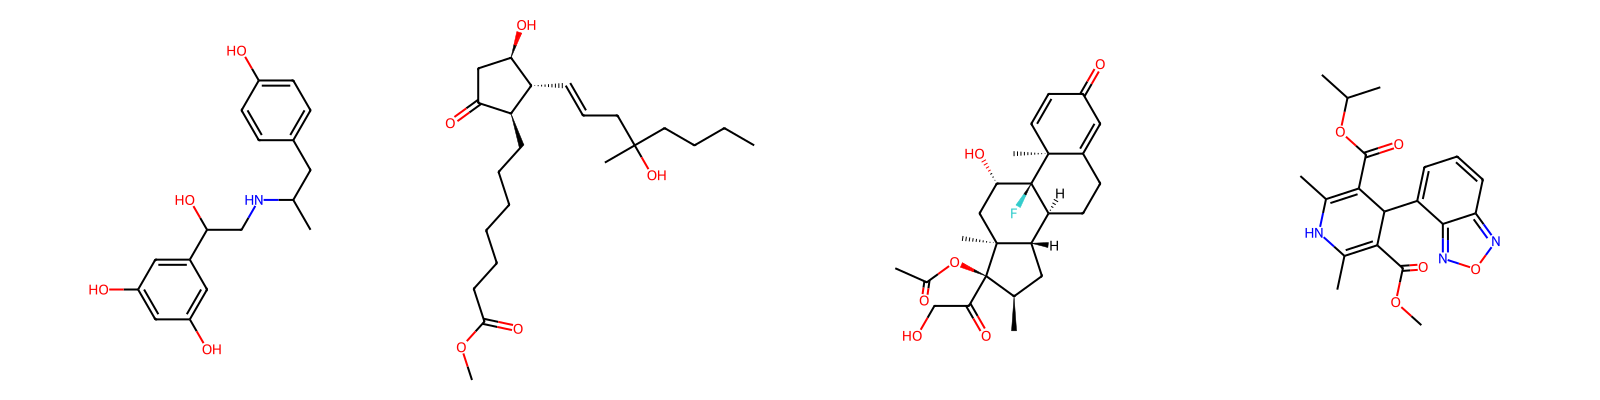

In [ ]:
img = Draw.MolsToGridImage(drugs_lr.loc[:, 0], subImgSize=(400,400), molsPerRow=4)
img

In [ ]:
oth = drugs_df[~drugs_df.loc[:,0].isin(drugs_lr.loc[:,0])].loc[:,0]
img = Draw.MolsToGridImage(oth, molsPerRow=4, subImgSize=(400,400))

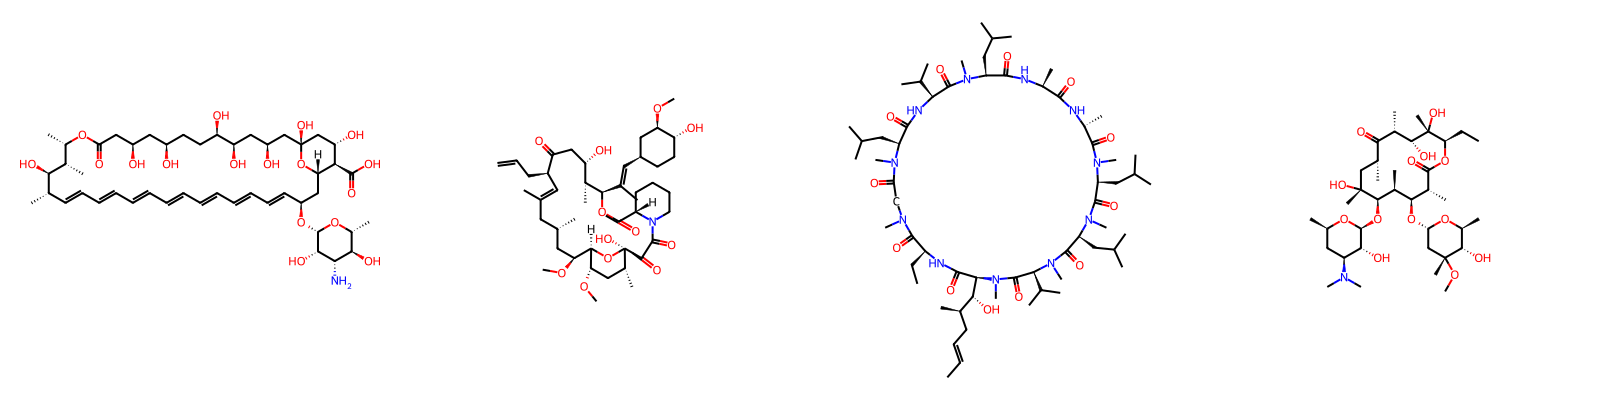

In [ ]:
img

Drawing Reaction

In [ ]:
rxn = AllChem.ReactionFromSmarts('OC(C1=CC=CC=C1)=O.NC1CCCCC1>>O=C(NC1CCCCC1)C2=CC=CC=C2', useSmiles=True)

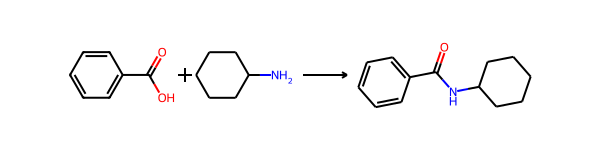

In [ ]:
rxn